## 1. Collect the images

In [37]:
def screen_capture():
    import pyscreenshot as ImageGrab #pip install pyscreenshot
    import time

    #images_folder = "captured_images/9/"
    images_folder = "new_images/"

    for i in range(10):
        time.sleep(10)
        im = ImageGrab.grab(bbox=(60, 170, 400, 550)) # X1,Y1,X2,Y2
        print ("saved....",i)
        im.save(images_folder+str(i)+'.png')
        print ("clear screen now and redraw again...")
    print("finish of image captured process")
screen_capture()

saved.... 0
clear screen now and redraw again...
saved.... 1
clear screen now and redraw again...
saved.... 2
clear screen now and redraw again...
saved.... 3
clear screen now and redraw again...
saved.... 4
clear screen now and redraw again...
saved.... 5
clear screen now and redraw again...
saved.... 6
clear screen now and redraw again...
saved.... 7
clear screen now and redraw again...
saved.... 8
clear screen now and redraw again...
saved.... 9
clear screen now and redraw again...
finish of image captured process


 ## 2. Create data with label

In [17]:
import numpy as np

def create_label(image_name):
    """ Create an one-hot encoded vector from image name """ 
    if image_name == '0':  
        return np.array([1,0,0,0,0,0,0,0,0,0])
    elif image_name == '1':
        return np.array([0,1,0,0,0,0,0,0,0,0])
    elif image_name == '2':
        return np.array([0,0,1,0,0,0,0,0,0,0])
    elif image_name == '3':
        return np.array([0,0,0,1,0,0,0,0,0,0])
    elif image_name == '4':
        return np.array([0,0,0,0,1,0,0,0,0,0])
    elif image_name == '5':
        return np.array([0,0,0,0,0,1,0,0,0,0])
    elif image_name == '6':
        return np.array([0,0,0,0,0,0,1,0,0,0])
    elif image_name == '7':
        return np.array([0,0,0,0,0,0,0,1,0,0])
    elif image_name == '8':
        return np.array([0,0,0,0,0,0,0,0,1,0])
    elif image_name == '9':
        return np.array([0,0,0,0,0,0,0,0,0,1])

import os
import cv2
from random import shuffle
from tqdm import tqdm

def create_data():
    data = []
    for folder in tqdm(os.listdir("captured_images")):
        for img in os.listdir("captured_images/"+folder):
            path = os.path.join("captured_images",folder, img)
            img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            try:
                img_data = cv2.resize(img_data, (28,28))
            except cv2.error as e:
                continue
            data.append([np.array(img_data), create_label(folder)])
    shuffle(data)
    return data

In [20]:
data = create_data()

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 75.06it/s]


# 3. Dividing data into training and testing part

In [21]:
train = data[:40]
test = data[40:]
X_train = np.array([i[0] for i in train]).reshape(-1, 28,28, 1)
y_train = [i[1] for i in train]
X_test = np.array([i[0] for i in test]).reshape(-1, 28,28, 1)
y_test = [i[1] for i in test]

## 4. Building the model

In [33]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

In [34]:
## Steps of Convolutional neural network:
# 1. Convolution layers
# 2. Normalization
# 3. Pooling
# 4. Fully connected

In [45]:
ops.reset_default_graph()
convnet = input_data(shape=[28,28, 1], name='input') 
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = fully_connected(convnet, 1024, activation='relu') #to know the parameter and all press shift tab
convnet = dropout(convnet, 0.8) #prevent a model from overfitting
convnet = fully_connected(convnet, 10, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=0.001, loss='categorical_crossentropy', name='targets')  
model = tflearn.DNN(convnet, tensorboard_verbose=1)  
model.fit({'input': X_train}, {'targets': y_train}, n_epoch=12,
          validation_set=({'input': X_test}, {'targets': y_test}),
          show_metric=True)

---------------------------------
Run id: PFIA13
Log directory: /tmp/tflearn_logs/
INFO:tensorflow:Summary name Accuracy/ (raw) is illegal; using Accuracy/__raw_ instead.
---------------------------------
Training samples: 40
Validation samples: 10
--
Training Step: 1  | time: 1.444s
| Adam | epoch: 001 | loss: 0.00000 - acc: 0.0000 | val_loss: 2.43906 - val_acc: 0.0000 -- iter: 40/40
--
Training Step: 2  | total loss: 2.07360 | time: 1.179s
| Adam | epoch: 002 | loss: 2.07360 - acc: 0.1125 | val_loss: 2.54901 - val_acc: 0.0000 -- iter: 40/40
--
Training Step: 3  | total loss: 2.25299 | time: 1.191s
| Adam | epoch: 003 | loss: 2.25299 - acc: 0.1636 | val_loss: 2.65818 - val_acc: 0.0000 -- iter: 40/40
--
Training Step: 4  | total loss: 2.27710 | time: 1.187s
| Adam | epoch: 004 | loss: 2.27710 - acc: 0.1347 | val_loss: 2.60033 - val_acc: 0.0000 -- iter: 40/40
--
Training Step: 5  | total loss: 2.27427 | time: 1.175s
| Adam | epoch: 005 | loss: 2.27427 - acc: 0.1453 | val_loss: 2.55783 -

## 5. Let's predict and display using matplotlib


In [46]:
def create_test_data():
    data = []
    for img in tqdm(os.listdir("new_images")):
        path = os.path.join("new_images", img)
        img_num = img.split('.')[0] 
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        try:
            img_data = cv2.resize(img_data, (28,28))
        except cv2.error as e:
            continue
        data.append([np.array(img_data), img_num])

    shuffle(data)
    return data

In [47]:
test_data = create_test_data()

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 395.82it/s]


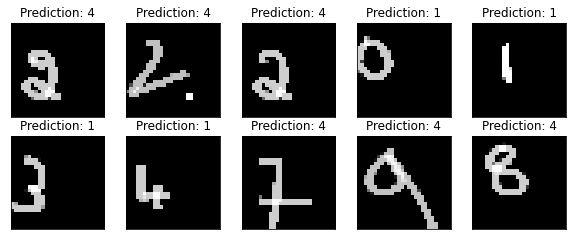

In [48]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
for num, data in enumerate(test_data[:10]):
    img_data = data[0]
    y = fig.add_subplot(5,5, num + 1)
    orig = img_data
    data = img_data.reshape(28,28, 1)
    model_out = model.predict([data])
    str_label = "Prediction: " + str(np.argmax(model_out))

    y.imshow(orig, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()